#### Part 5 Train CNN with RMSprop and Adam



In [2]:
import numpy as np
import keras
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
def resizing(mnist):
     train_data = []
     for img in mnist:
            resized_img = cv2.resize(img, (32, 32))
            train_data.append(resized_img)
     return train_data
newX_train = np.array(resizing(X_train))
newX_test = np.array(resizing(X_test))

In [4]:
from keras import backend
if keras.backend.image_data_format() == 'channels_first':
  newX_train = newX_train.reshape(len(newX_train), 1, 32, 32)
  newX_test = newX_test.reshape(len(newX_test), 1, 32, 32)
  input_shape = (1, 32, 32)
else:
  newX_train = newX_train.reshape(len(newX_train), 32, 32, 1)
  newX_test = newX_test.reshape(len(newX_test), 32, 32, 1)
  input_shape = (32, 32, 1)

In [5]:
from keras.utils import np_utils
newX_train = newX_train.astype('float32')
newX_train /= 255
newX_test = newX_test.astype('float32')
newX_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
modela = Sequential()
modela.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modela.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modela.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modela.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modela.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modela.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modela.add(Flatten()) 
modela.add(Dense(4096, activation='relu'))
modela.add(Dropout(0.5))
modela.add(Dense(4096, activation='relu'))
modela.add(Dropout(0.5))
modela.add(Dense(10, activation='sigmoid'))
modela.summary()

In [ ]:
modela.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6), metrics=['accuracy'])

In [ ]:
historya = modela.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test,Y_test), epochs=10, verbose=1)
score = modela.evaluate(newX_test, Y_test, batch_size=32)

In [ ]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(historya.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(historya.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('A3E1-5.ipynb')

### Optimzer: RMSprop

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
modelr = Sequential()
modelr.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modelr.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modelr.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modelr.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modelr.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
modelr.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
modelr.add(Flatten()) 
modelr.add(Dense(4096, activation='relu'))
modelr.add(Dropout(0.5))
modelr.add(Dense(4096, activation='relu'))
modelr.add(Dropout(0.5))
modelr.add(Dense(10, activation='sigmoid'))
modelr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)        

In [8]:
modelr.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [9]:
historyr = modelr.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test,Y_test), epochs=10, verbose=1)
modelr.evaluate(newX_test, Y_test, batch_size=32)

Epoch 1/10
188/188 [==============================] - 454s 2s/step - loss: 2.6957 - accuracy: 0.1072 - val_loss: 2.3021 - val_accuracy: 0.0982
Epoch 2/10
188/188 [==============================] - 439s 2s/step - loss: 1.7254 - accuracy: 0.3483 - val_loss: 1.3414 - val_accuracy: 0.5375
Epoch 3/10
188/188 [==============================] - 445s 2s/step - loss: 0.5232 - accuracy: 0.8555 - val_loss: 0.2617 - val_accuracy: 0.9303
Epoch 4/10
188/188 [==============================] - 437s 2s/step - loss: 0.3048 - accuracy: 0.9363 - val_loss: 0.9524 - val_accuracy: 0.8312
Epoch 5/10
188/188 [==============================] - 438s 2s/step - loss: 0.2873 - accuracy: 0.9458 - val_loss: 0.4795 - val_accuracy: 0.9224
Epoch 6/10
188/188 [==============================] - 438s 2s/step - loss: 0.2263 - accuracy: 0.9633 - val_loss: 0.3213 - val_accuracy: 0.9467
Epoch 7/10
188/188 [==============================] - 440s 2s/step - loss: 0.2421 - accuracy: 0.9630 - val_loss: 0.3537 - val_accuracy: 0.8670

[0.22202114760875702, 0.9431999921798706]

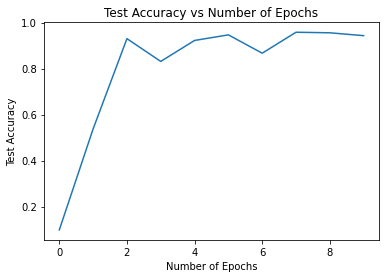

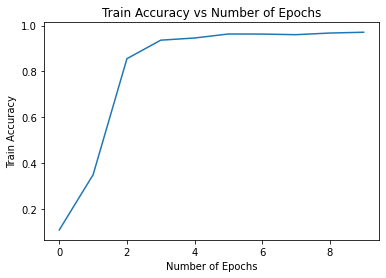

In [10]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(historyr.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(historyr.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

In [13]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('A3E1-5.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/A3E1-5.ipynb to pdf
[NbConvertApp] Support files will be in A3E1-5_files/
[NbConvertApp] Making directory ./A3E1-5_files
[NbConvertApp] Making directory ./A3E1-5_files
[NbConvertApp] Writing 50459 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 59933 bytes to /content/drive/My Drive/A3E1-5.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'